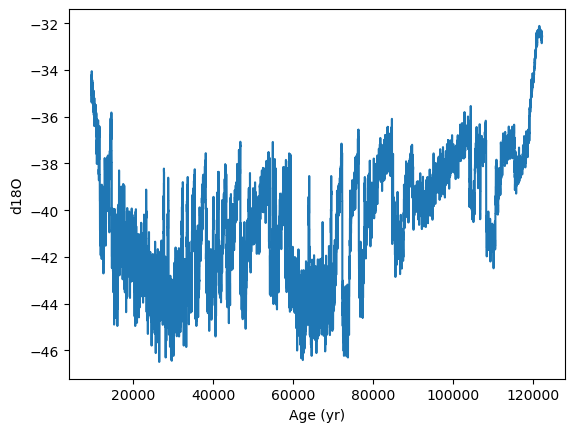

          age   d18O
0        9540 -34.24
1        9560 -34.24
2        9560 -35.02
3        9580 -35.02
4        9580 -35.02
...       ...    ...
11269  122240 -32.66
11270  122240 -32.51
11271  122260 -32.51
11272  122260 -32.56
11273  122280 -32.56

[11274 rows x 2 columns]


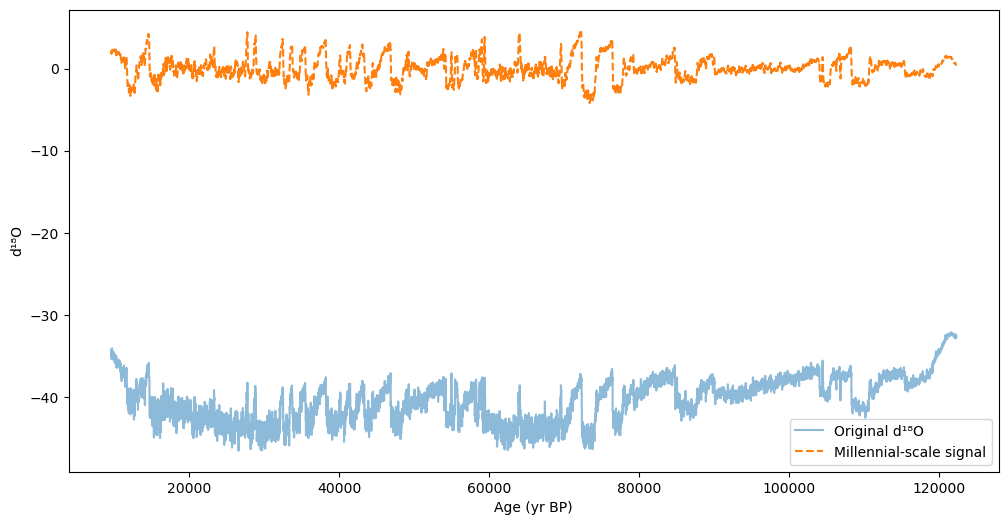

          age   d18O   smoothed    signal
0        9540 -34.24 -36.709520  2.025531
1        9560 -34.24 -36.719880  1.980864
2        9560 -35.02 -36.730159  2.018307
3        9580 -35.02 -36.746126  2.048869
4        9580 -35.02 -36.761969  2.015937
...       ...    ...        ...       ...
11269  122240 -32.66 -33.106196  0.461246
11270  122240 -32.51 -33.100157  0.480470
11271  122260 -32.51 -33.093399  0.505288
11272  122260 -32.56 -33.086587  0.510960
11273  122280 -32.56 -33.079283  0.519635

[11274 rows x 4 columns]
           age       pre
0          0.0  0.016280
1        100.0  0.016431
2        200.0  0.016568
3        300.0  0.016690
4        400.0  0.016798
...        ...       ...
1396  139600.0  0.032849
1397  139700.0  0.032591
1398  139800.0  0.032310
1399  139900.0  0.032007
1400  140000.0  0.031682

[1401 rows x 2 columns]
           age       obl
0          0.0  0.409093
1        100.0  0.409320
2        200.0  0.409547
3        300.0  0.409773
4        400.0  0.41

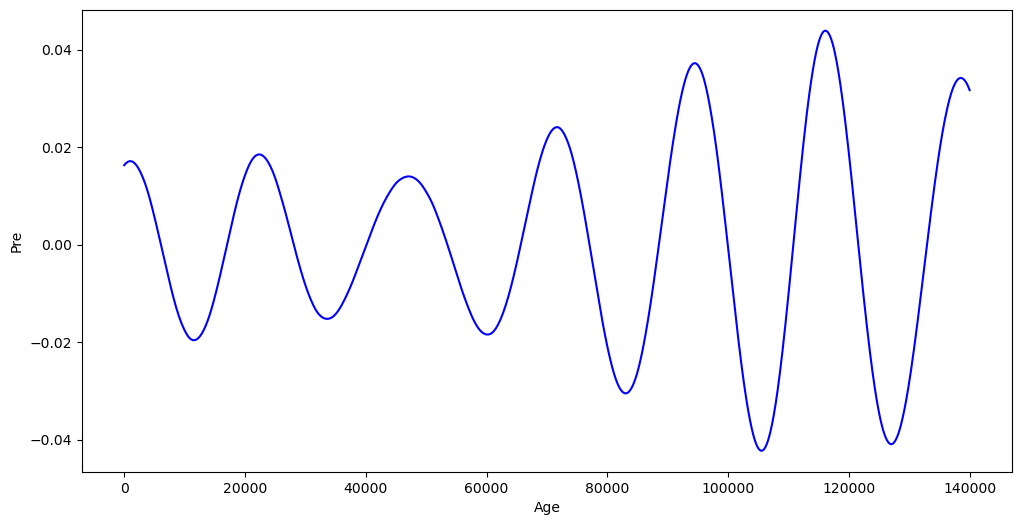

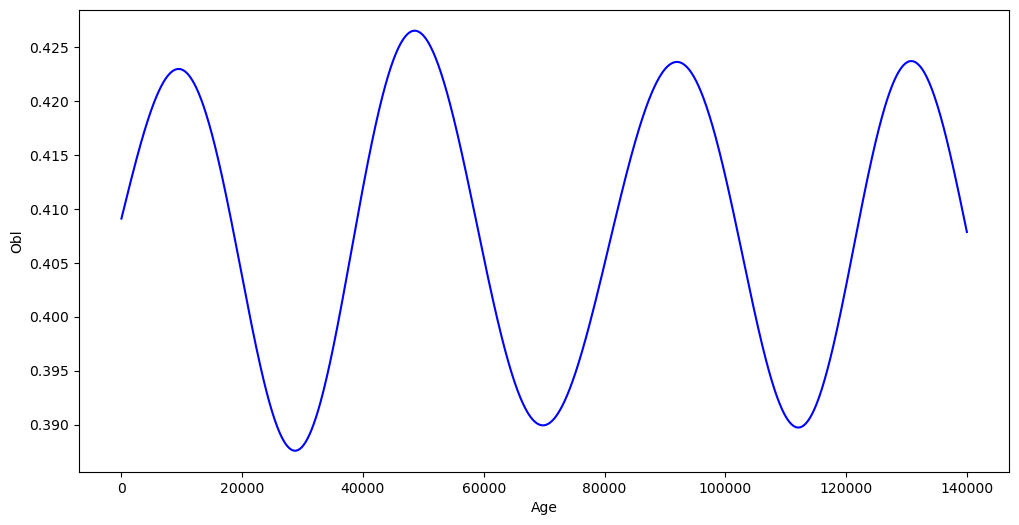

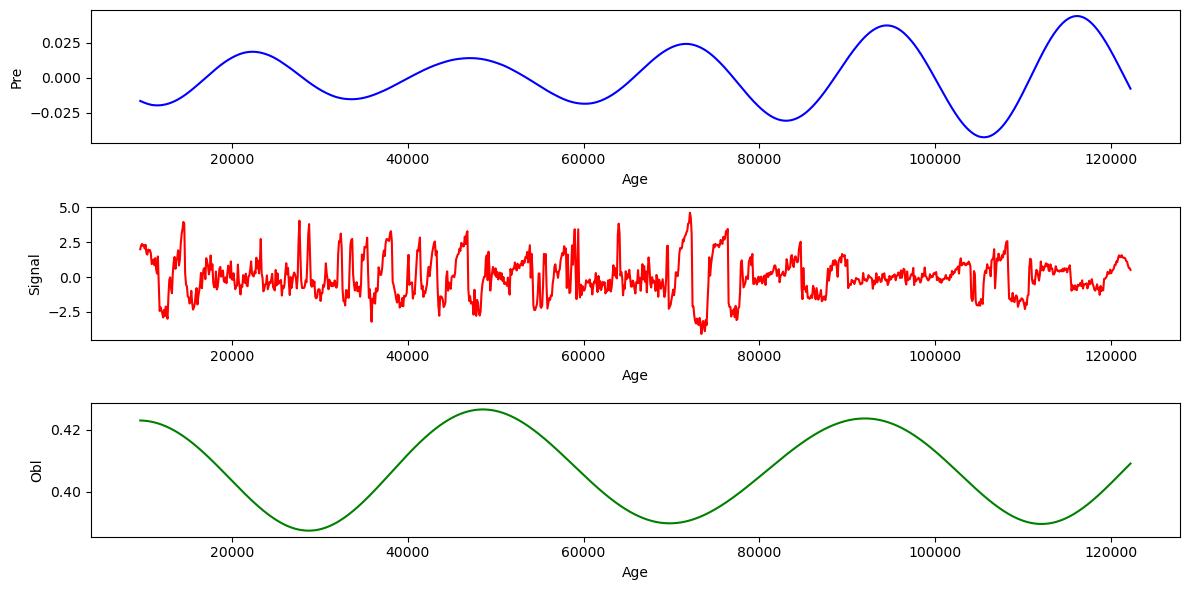

           age       pre
0          0.0 -0.007750
1        100.0 -0.006555
2        200.0 -0.005352
3        300.0 -0.004143
4        400.0 -0.002927
...        ...       ...
1122  112200.0 -0.017566
1123  112300.0 -0.017310
1124  112400.0 -0.017041
1125  112500.0 -0.016759
1126  112600.0 -0.016466

[1127 rows x 2 columns]
           age       obl
0          0.0  0.409125
1        100.0  0.408842
2        200.0  0.408558
3        300.0  0.408273
4        400.0  0.407988
...        ...       ...
1122  112200.0  0.422906
1123  112300.0  0.422925
1124  112400.0  0.422941
1125  112500.0  0.422952
1126  112600.0  0.422959

[1127 rows x 2 columns]
           age      d18O
0          0.0  0.509176
1        100.0  0.641579
2        200.0  0.656344
3        300.0  0.866605
4        400.0  1.104129
...        ...       ...
1122  112200.0  2.285959
1123  112300.0  2.222392
1124  112400.0  2.364831
1125  112500.0  2.275199
1126  112600.0  1.991046

[1127 rows x 2 columns]


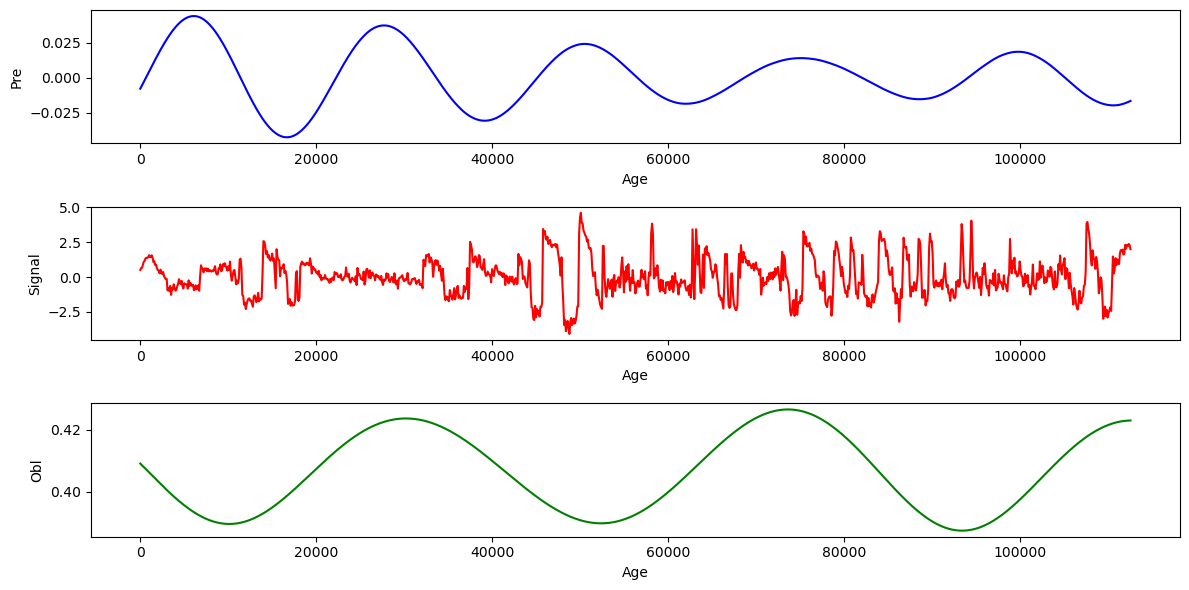

In [81]:
import pandas as pd


path = "D:/VScode/bipolar_seesaw_CCM/ice_core_data/Ant_Gre.xlsx"


df_ngrip = pd.read_excel(path, sheet_name="NGRIP")


import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, sharex=True)
# axs[0].plot(df_ant["age"], df_ant["d18O"], label="Antarctic Fivecore")
ax.plot(df_ngrip["age"], df_ngrip["d18O"], label="NGRIP")
ax.set_ylabel("d18O")
ax.set_xlabel("Age (yr)")
ax.set_ylabel("d18O")
plt.show()

print(df_ngrip)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # 1) Make sure df_ngrip is sorted by age
# df = df_ngrip.sort_values("age").reset_index(drop=True)
df=df_ngrip.copy()
df



# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import butter, filtfilt

# # 1) Define a Butterworth high-pass filter
# def butter_highpass(cutoff, fs, order=4):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='high', analog=False)
#     return b, a

# # 2) Parameters
# dt = 20.0              # years between samples
# fs = 1.0 / dt          # sampling frequency [per year]
# cutoff = 1.0 / 10000.0 # desired cutoff [per year]
# order = 4

# # 3) Design filter
# b, a = butter_highpass(cutoff, fs, order=order)
# # 4) Apply filter (zero-phase) to the d18O column
# df['signal'] = filtfilt(b, a, df['d18O'].values)

# # 5) Plot original and high-pass
# plt.figure(figsize=(10,4))
# plt.plot(df['age'], df['d18O'],   label='Original δ¹⁸O', alpha=0.6)
# plt.plot(df['age'], df['signal'], label='High-pass δ¹⁸O', linewidth=1)
# plt.xlabel('Age (yr)')
# plt.ylabel('δ¹⁸O')
# plt.title('High-pass filter (cutoff = 1/10000 yr⁻¹)')
# plt.legend()
# plt.grid(True)
# plt.show()



























# 2) Compute rolling mean over an 8 000 yr window
#    (assumes ∆age ≈ 20 yr → window ≈ 8000/20 = 400 samples)
window = int(10000 / np.median(np.diff(df["age"])))
df["smoothed"] = df["d18O"].rolling(window=window, center=True, min_periods=1).mean()

# 3) Millennial‐scale signal = original minus low‐frequency
df["signal"] = df["d18O"] - df["smoothed"]

df["signal"] = df["signal"].rolling(window=10, center=True, min_periods=1).mean()

# 4) Plot to check
plt.figure(figsize=(12, 6))
plt.plot(df["age"], df["d18O"],       label="Original d¹⁸O",   alpha=0.5)
# plt.plot(df["age"], df["smoothed"],   label=f"{8000} yr rolling mean", linewidth=2)
plt.plot(df["age"], df["signal"],     label="Millennial‐scale signal", linestyle="--")
# plt.gca().invert_xaxis()  # if age is “years before present”
plt.xlabel("Age (yr BP)")
plt.ylabel("d¹⁸O")
plt.legend()
plt.show()

print(df)



import pandas as pd
from scipy.interpolate import interp1d

# Read the file into a DataFrame
df_pre = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_long.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)

df_obl = pd.read_csv(
    r"D:\VScode\bipolar_seesaw_CCM\inso_data\obl_long.txt", 
    sep='\s+',       # '\s+' means "split on any whitespace"
    header=None,     # or specify a row number if there's a header
    engine='python'
)


df_pre.iloc[:, 0] = df_pre.iloc[:, 0].abs() * 1000
df_obl.iloc[:, 0] = df_obl.iloc[:, 0].abs() * 1000

# Reverse the DataFrame rows
df_pre = df_pre.iloc[::-1]
# Reset the index
df_pre.reset_index(drop=True, inplace=True)
df_pre.columns = ['age', 'pre']

df_obl = df_obl.iloc[::-1]
# Reset the index
df_obl.reset_index(drop=True, inplace=True)
df_obl.columns = ['age', 'obl']

# plot df_pre
plt.figure(figsize=(12, 6))
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
# print(df_pre)
print(df_pre)

# plot df_obl
plt.figure(figsize=(12, 6))
plt.plot(df_obl.iloc[:, 0], df_obl.iloc[:, 1], label='obl', color='blue')
plt.xlabel("Age")
plt.ylabel("Obl")
# print(df_obl)
print(df_obl)

# crop the df_pre between Start age:  9540 End age:  122280
df_pre = df_pre[(df_pre['age'] >= 9540) & (df_pre['age'] <= 122280)]
df_obl = df_obl[(df_obl['age'] >= 9540) & (df_obl['age'] <= 122280)]

# Reset the index
df_pre.reset_index(drop=True, inplace=True)
print(df_pre)

df_obl.reset_index(drop=True, inplace=True)
print(df_obl)



# # build an interpolator; use 'nearest' to preserve the step
f = interp1d(df['age'].values, df['signal'].values, kind='nearest',
             bounds_error=False,
             fill_value=1)            

interpolated_sq = f(df_pre['age'].values)



df_sd=pd.DataFrame({'age':df_pre['age'].values,'d18O':interpolated_sq})

print(df_sd)


# plot df_pre and df_sd in 2 by 1 subplots
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.subplot(3, 1, 2)
plt.plot(df_sd['age'], df_sd['d18O'], label='signal', color='red')
plt.xlabel("Age")
plt.ylabel("Signal")
plt.subplot(3, 1, 3)
plt.plot(df_obl['age'], df_obl['obl'], label='obl', color='green')
plt.xlabel("Age")
plt.ylabel("Obl")
plt.tight_layout()
plt.show()






df_pre['age']=df_pre['age'].values * -1 +122200.0  
df_obl['age']=df_obl['age'].values * -1 +122200.0
df_sd['age']=df_sd['age'].values * -1 +122200.0  

# flip the two dfs upside down
df_pre = df_pre.iloc[::-1]
df_obl = df_obl.iloc[::-1]
df_sd = df_sd.iloc[::-1]

# Reset the index
df_pre.reset_index(drop=True, inplace=True)
df_obl.reset_index(drop=True, inplace=True)
df_sd.reset_index(drop=True, inplace=True)

print(df_pre)
print(df_obl)
print(df_sd)


# df_sd["d18O"] = df_sd["d18O"].rolling(window=5, center=True, min_periods=1).mean()

# # resample df_sd, df_obl, df_pre to 1000 years (10 data points)
# df_pre = df_pre.iloc[::10, :]
# df_obl = df_obl.iloc[::10, :]
# df_sd = df_sd.iloc[::10, :]

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df_pre.iloc[:, 0], df_pre.iloc[:, 1], label='pre', color='blue')
plt.xlabel("Age")
plt.ylabel("Pre")
plt.subplot(3, 1, 2)
plt.plot(df_sd['age'], df_sd['d18O'], label='signal', color='red')
plt.xlabel("Age")
plt.ylabel("Signal")
plt.subplot(3, 1, 3)
plt.plot(df_obl['age'], df_obl['obl'], label='obl', color='green')
plt.xlabel("Age")
plt.ylabel("Obl")
plt.tight_layout()
plt.show()


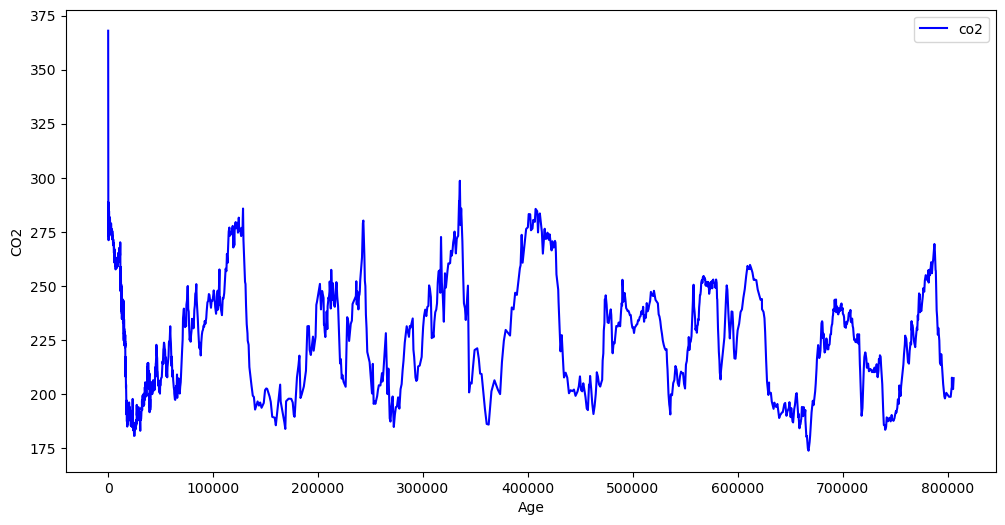

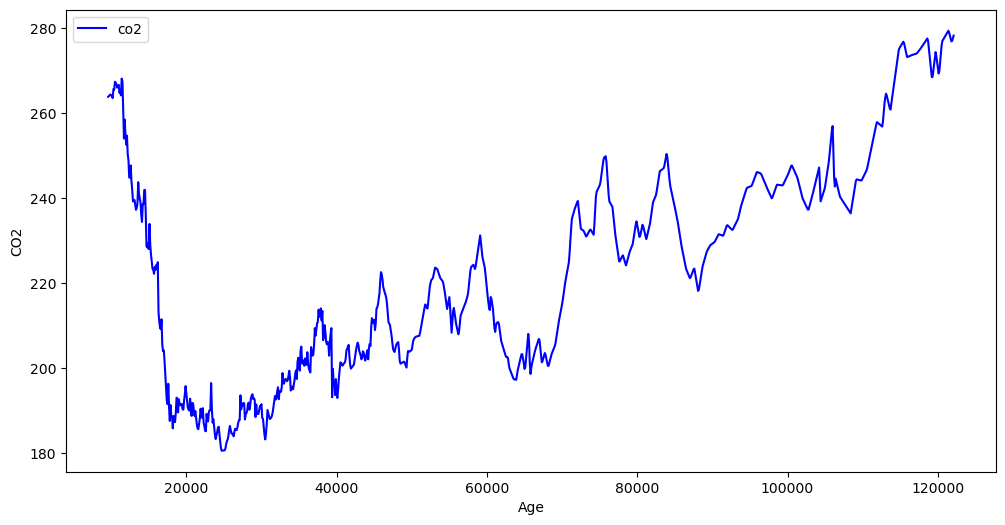

         age         co2    smoothed
0        100  278.249988  277.601985
1        200  277.614409  277.797347
2        300  276.978829  277.997884
3        400  276.899582  278.120389
4        500  277.589561  278.188272
...      ...         ...         ...
1121  112200  264.189583  264.389398
1122  112300  264.398100  264.247373
1123  112400  264.215046  264.040615
1124  112500  264.031991  264.122048
1125  112600  263.848937  264.136731

[1126 rows x 3 columns]
         age   lr04  smoothed
0        100  3.172  3.192000
1        200  3.180  3.196000
2        300  3.188  3.200000
3        400  3.196  3.204000
4        500  3.204  3.208000
...      ...    ...       ...
1121  112200  3.520  3.513333
1122  112300  3.506  3.508500
1123  112400  3.492  3.503429
1124  112500  3.478  3.498000
1125  112600  3.464  3.492000

[1126 rows x 3 columns]


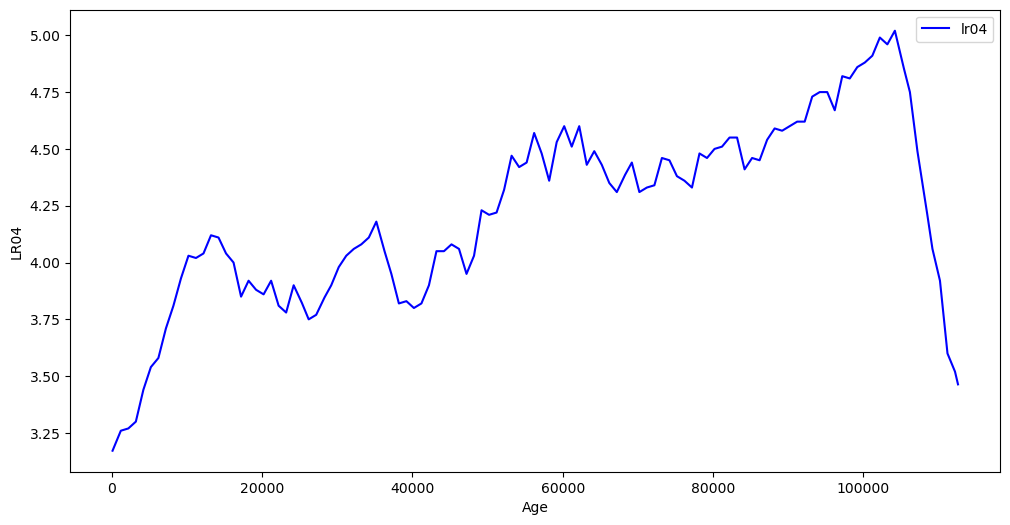

In [93]:
# read composite_co2.xlsx from D:\VScode\bipolar_seesaw_CCM\other_data
df_co2 = pd.read_excel(
    r"D:\VScode\bipolar_seesaw_CCM\other_data\composite_co2.xlsx", 
    sheet_name='Sheet2'
)
# rename the columns to 'age' and 'co2'
df_co2.columns = ['age', 'co2']
# # plot the hist of age idff
# plt.figure(figsize=(12, 6))
# plt.hist(np.diff(df_co2['age']), bins=100, color='blue', alpha=0.5)
# plt.xlabel("Age")

# plot the df_co2
plt.figure(figsize=(12, 6))
plt.plot(df_co2['age'], df_co2['co2'], label='co2', color='blue')
plt.xlabel("Age")
plt.ylabel("CO2")
plt.legend()
plt.show()


# create a nw time from 0 to 641200 with a step of 1000
new_time = np.arange(9600, 122200, 100)
# interpolate the co2 data to the new time
new_co2 = np.interp(new_time, df_co2['age'], df_co2['co2'])
df_co2 = pd.DataFrame({'age': new_time, 'co2': new_co2})



df_co2["smoothed"] = df_co2["co2"].rolling(window=10, center=True, min_periods=1).mean()
# df_co2["co2"] = df_co2["co2"] - df_co2["smoothed"]



# plot the df_co2
plt.figure(figsize=(12, 6))
plt.plot(df_co2['age'], df_co2['co2'], label='co2', color='blue')
plt.xlabel("Age")
plt.ylabel("CO2")
plt.legend()
plt.show()

df_co2['age']=df_co2['age'].values * -1 +122200



# flip the two dfs upside down
df_co2 = df_co2.iloc[::-1]
# reset the index of df_co2
df_co2 = df_co2.reset_index(drop=True)
print(df_co2)




df_lr04= pd.read_excel(
    r"D:\VScode\bipolar_seesaw_CCM\other_data\lr04.xlsx", 
    sheet_name='Sheet1'
)

df_lr04.columns = ['age', 'lr04']
# age = age * 1000
df_lr04['age'] = df_lr04['age'] * 1000

# new_time = np.arange(0, 641200, 1000)
# interpolate the co2 data to the new time
new_lr04 = np.interp(new_time, df_lr04['age'], df_lr04['lr04'])
df_lr04 = pd.DataFrame({'age': new_time, 'lr04': new_lr04})


df_lr04["smoothed"] = df_lr04["lr04"].rolling(window=10, center=True, min_periods=1).mean()
# df_lr04["lr04"] = df_lr04["lr04"] - df_lr04["smoothed"]


df_lr04['age']=df_lr04['age'].values * -1 +122200
# flip the two dfs upside down
df_lr04 = df_lr04.iloc[::-1]
# reset the index of df_lr04
df_lr04 = df_lr04.reset_index(drop=True)

# # crop the first and last 50 rows of df_lr04 and df_co2
# df_lr04 = df_lr04.iloc[50:-50]
# df_co2 = df_co2.iloc[50:-50]


print(df_lr04)

# plot the df_lr04
plt.figure(figsize=(12, 6))
plt.plot(df_lr04['age'], df_lr04['lr04'], label='lr04', color='blue')
plt.xlabel("Age")
plt.ylabel("LR04")
plt.legend()
plt.show()


Using lib=1 1117, pred=1 1117


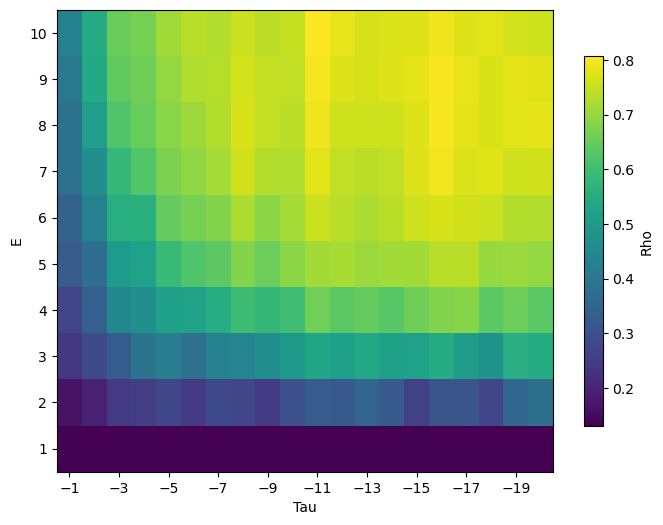

Best E=10, tau=-11 with rho=0.807
Optimal E = 10   Optimal tau = -11


In [85]:
from toolbox import ccm_functions as cf
import importlib
importlib.reload(cf)

best_E, best_tau, rho_matrix = cf.find_optimal_E_tau(
    df_sd   = df_sd,
    df_pre  = df_pre,
    maxE    = 10,
    tau_min  = -20,
    Tp=0,
)
print("Optimal E =", best_E, "  Optimal tau =", best_tau)

# Pre

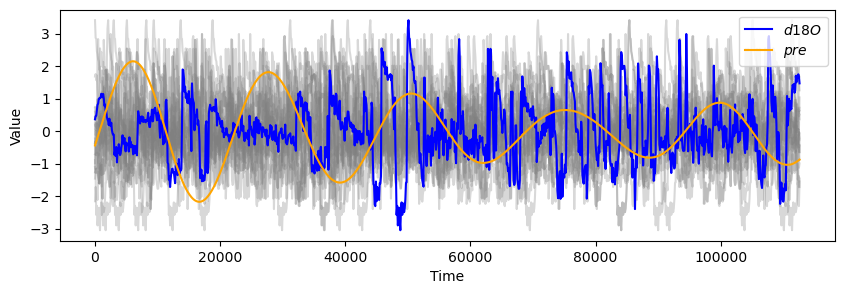

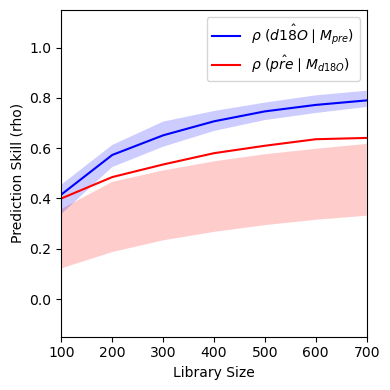

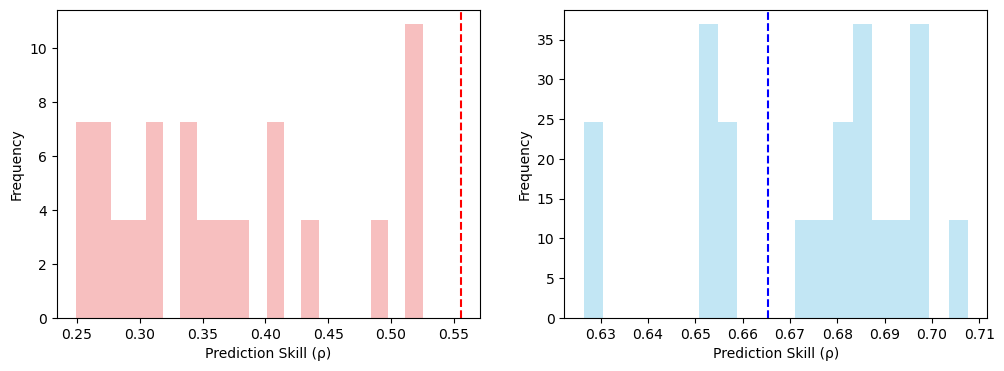

In [84]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd, 
    df_pre,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)


# ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
#     df_sd, 
#     df_pre,
#     E=5, 
#     tau=-20, 
#     n_ran=20, 
#     libSizes="10 20 30 40 50 60 70",
#     Tp=0,
#     sample=20,
#     random=True,
#     uni_dir=False,
#     showPlot=True)
# print(test_result)

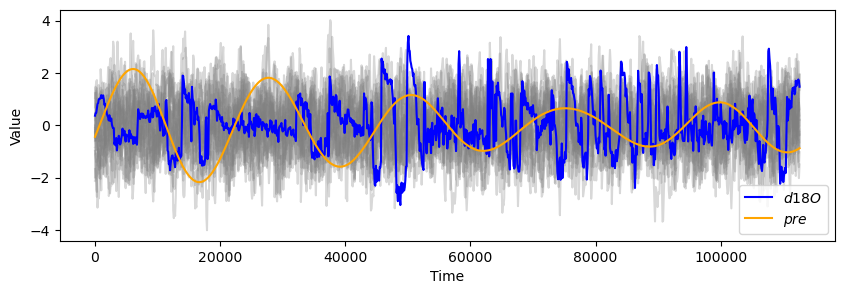

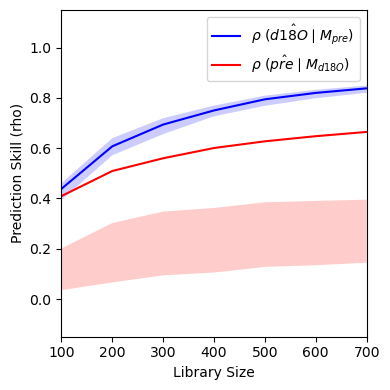

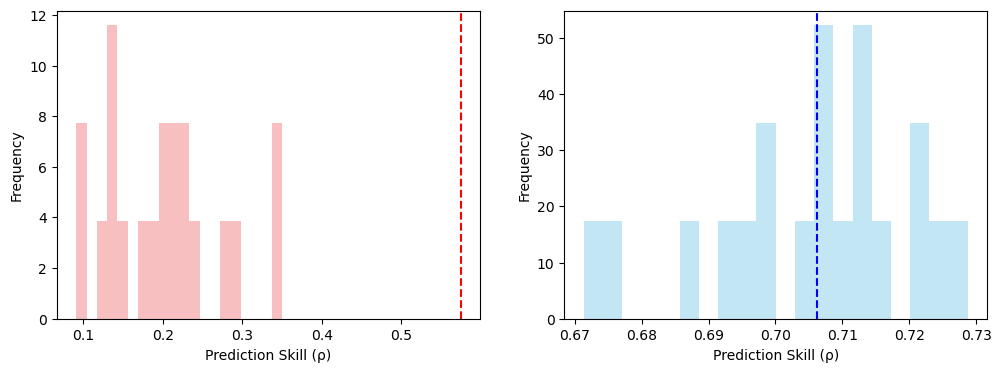

(True, False)


In [83]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_pre,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)
print(test_result)

# Obl

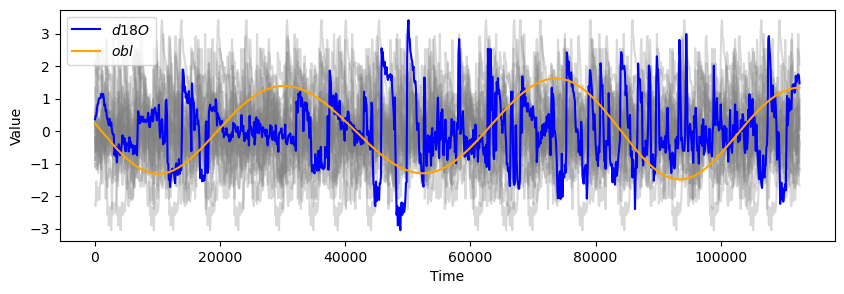

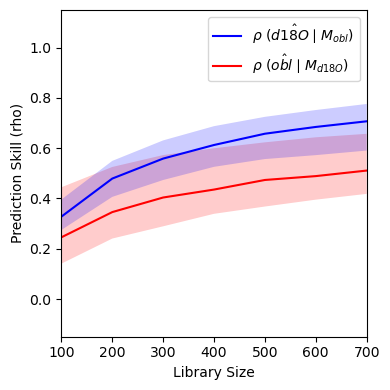

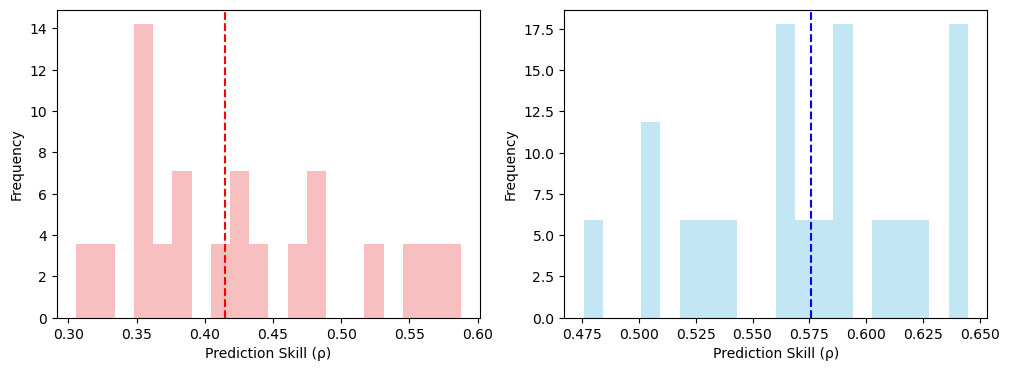

In [86]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd, 
    df_obl,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

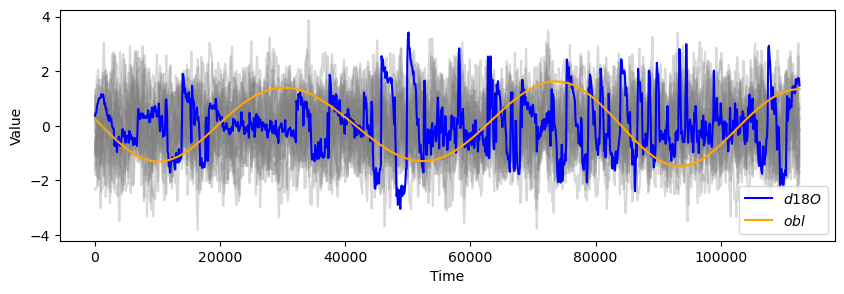

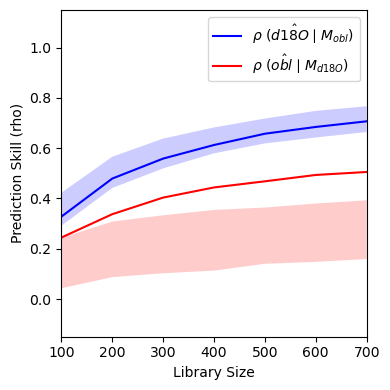

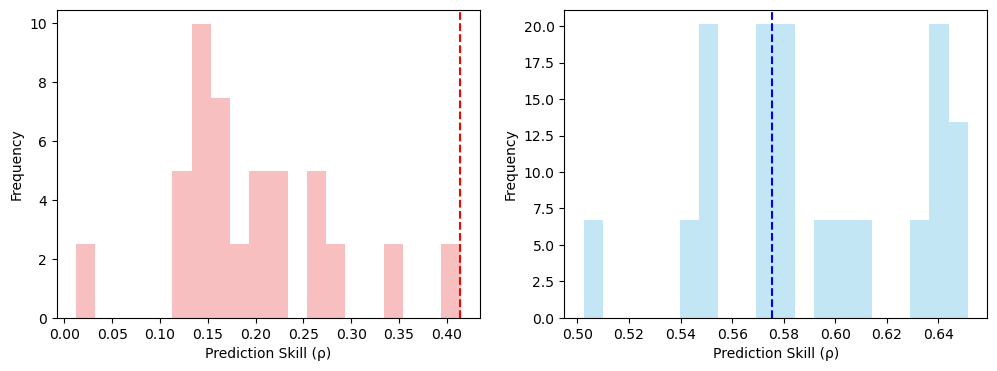

In [87]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_obl,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

# CO2

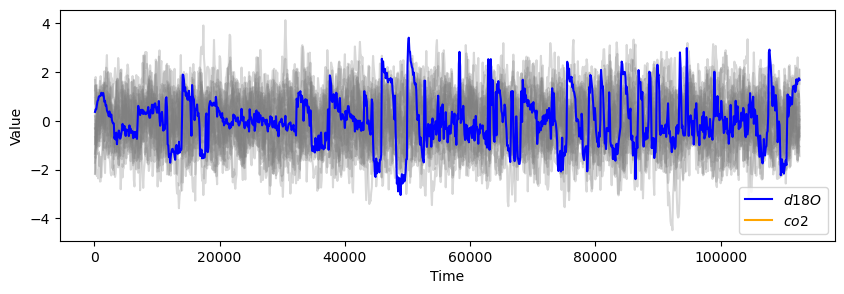

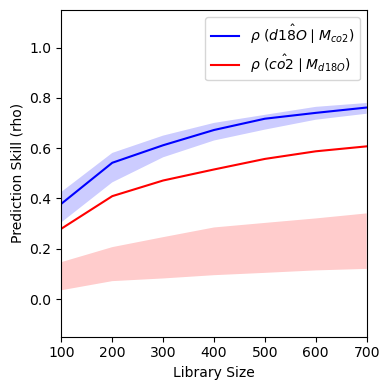

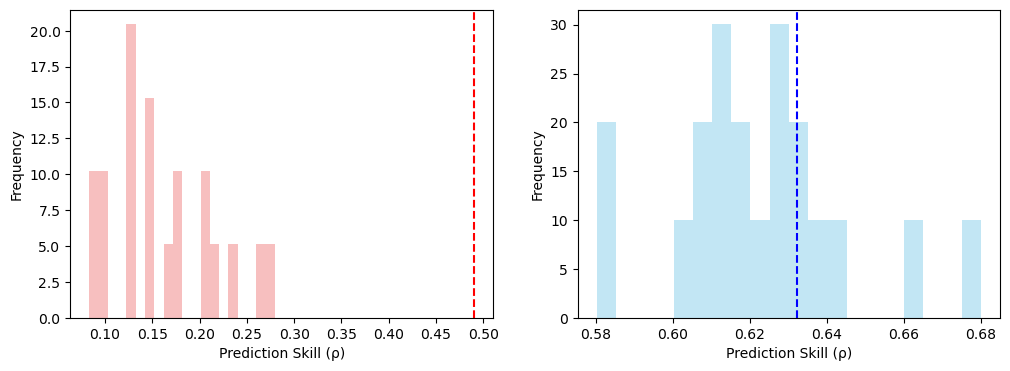

In [91]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_co2,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

# LR04

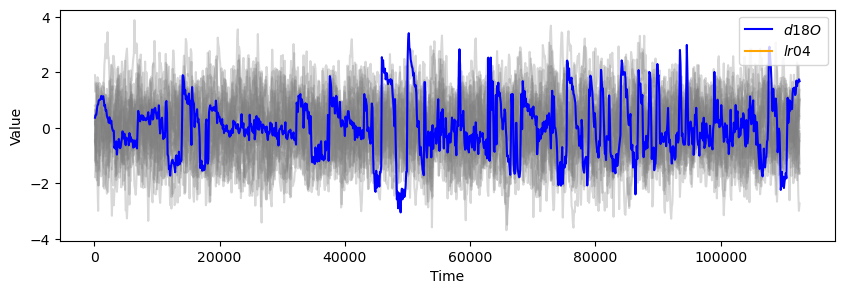

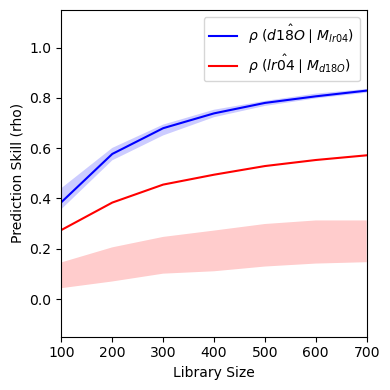

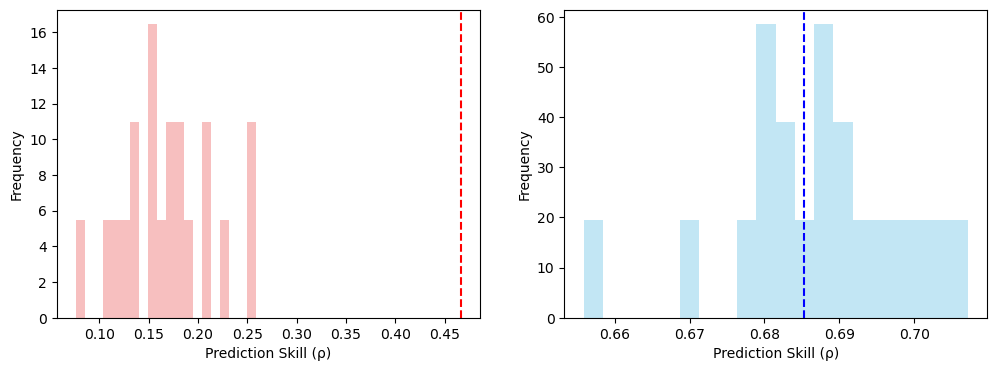

In [92]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v3(
    df_sd, 
    df_lr04,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="100 200 300 400 500 600 700",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)

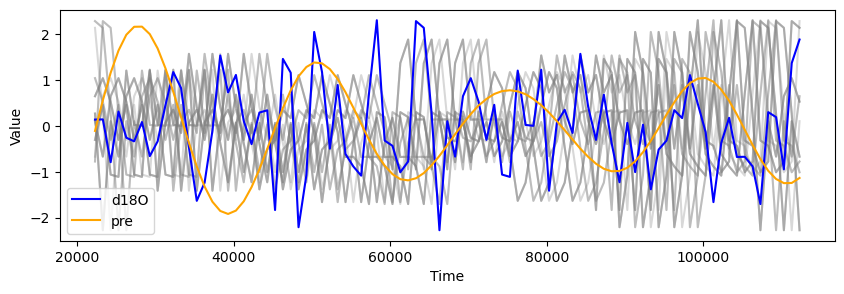

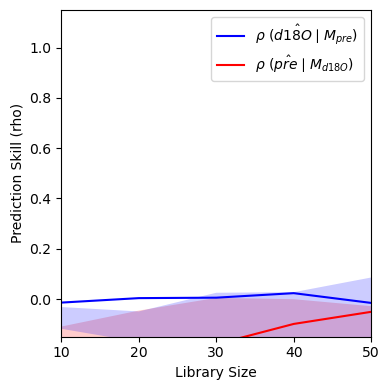

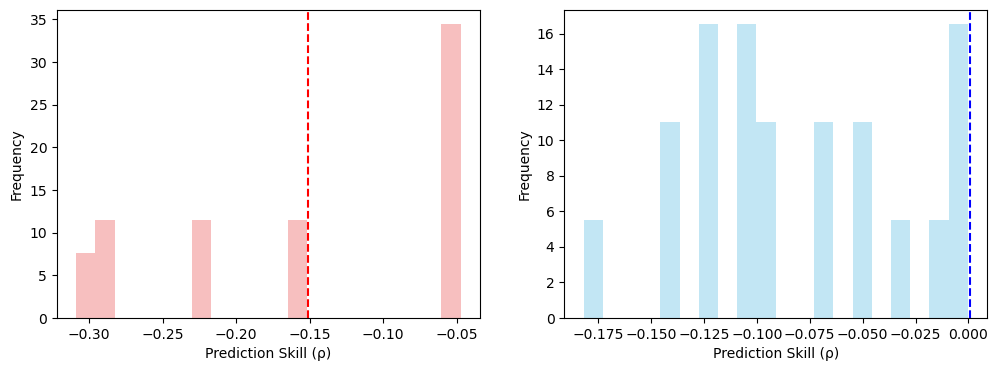

In [8]:
from toolbox import significant_test as st
import importlib
importlib.reload(st)



ccm_out, ran_ccm_list_xy, test_result=st.ccm_significance_test_v2(
    df_sd, 
    df_pre,
    E=5, 
    tau=-10, 
    n_ran=20, 
    libSizes="10 20 30 40 50",
    Tp=0,
    sample=20,
    random=True,
    uni_dir=False,
    showPlot=True)